<a href="https://colab.research.google.com/github/lax17/Techno_Touch/blob/master/UNIFYND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**IMAGE ACQUISITION**



In [124]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install tesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import files
import cv2  
import numpy as np
import pytesseract
from PIL import Image
from pytesseract import Output

In [139]:
drive.mount('/content/drive/')
uploaded = files.upload()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Saving a.jpg to a.jpg


In [0]:
def show_image(image):
  im = cv2.imread(image)                           
  cv2_imshow(im)                 
  cv2.waitKey(0)  

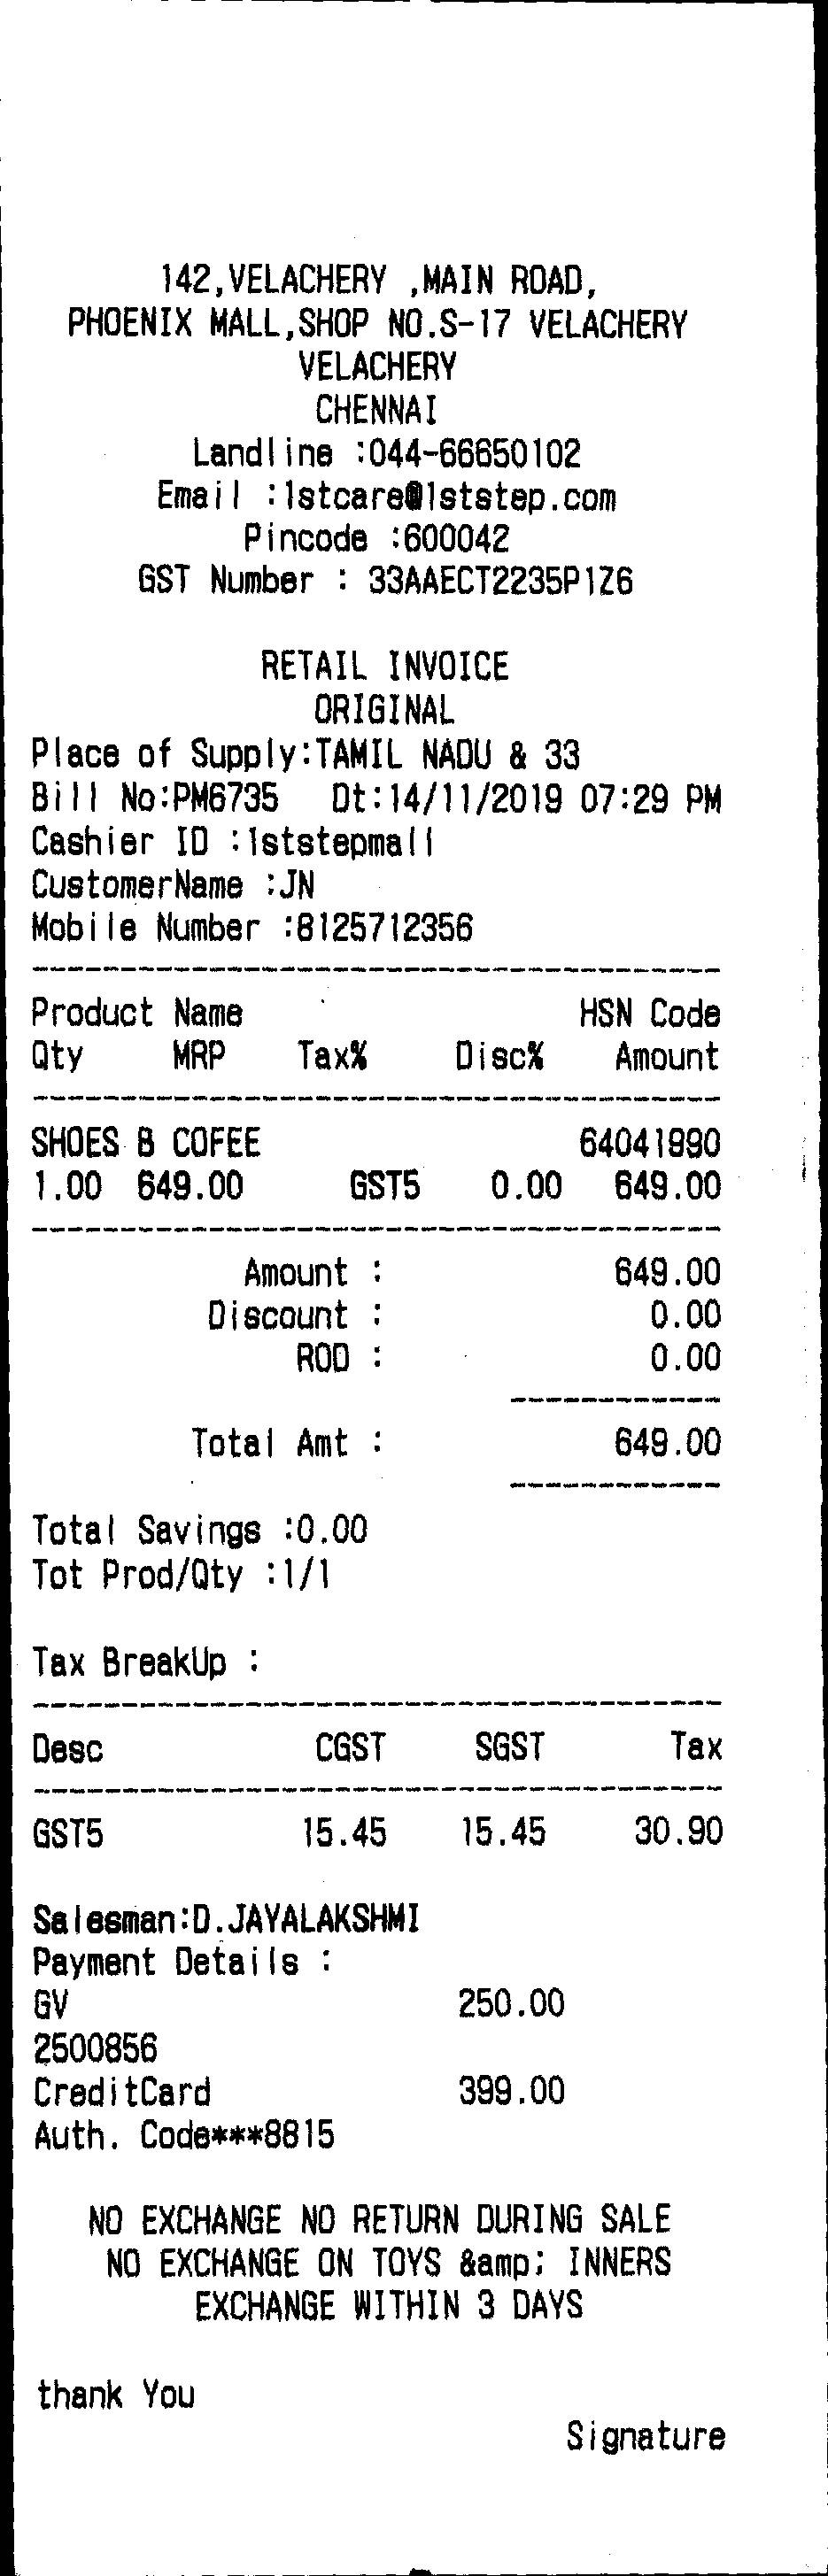

In [128]:
filename = next(iter(uploaded)) 
show_image(filename)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


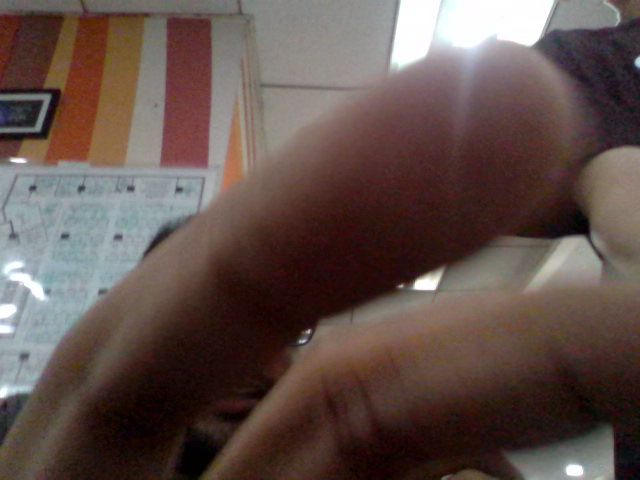

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [0]:
from PIL import Image
def detect_vertical_and_rotate_image(img_path):
  image = cv2.imread(img_path,0)
  res = (pytesseract.image_to_osd(Image.open(img_path),output_type=Output.DICT))
  orientation = res['orientation']
  if orientation == 90 or orientation == 180 or orientation==270:
    rotate = res['rotate']
    image_rotation = rotate_image(img_path,rotate)
    show_image(image_rotation)
  else:
    unrotated = cv2.imwrite(img_path, image)

def rotate_image(img_path,rotate):
  img = cv2.imread(img_path)
  if rotate == 270:
    rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    rotated = cv2.imwrite(img_path, rot)
    return rotated
  if rotate == 90:
    rot = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    rotated = cv2.imwrite(img_path, rot)
    return rotated
  elif rotate == 180:
    rot = cv2.rotate(img, cv2.ROTATE_180)
    rotated = cv2.imwrite(img_path, rot)
    return rotated
  else:
    return img

In [0]:
detect_vertical_and_rotate_image(filename)

In [0]:
def remove_noise_and_smooth(img_path):
    img = cv2.imread(img_path,0)
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    or_image = cv2.bitwise_or(img, closing)
    cv2.imwrite(img_path, or_image)

In [0]:
remove_noise_and_smooth(filename)

In [0]:
def sharpen_image(img_path):
  image = cv2.imread(img_path,0)
  sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
  sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
  sharp_image = cv2.imwrite(img_path, sharpened_image)

In [0]:
sharpen_image(filename)

In [0]:
def correct_skewed_image(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)
  thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
  coords = np.column_stack(np.where(thresh > 0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90 + angle)
  else:
    angle = -angle
  if not angle == 0.0 or angle== -0.0:
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    correct_image = cv2.putText(rotated, "Angle: {:.2f} degrees".format(angle),
    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

In [0]:
correct_skewed_image(filename)

In [140]:
import re
import os
import pprint
# dirs = os.listdir('drive/My Drive/Common/')
# listi = []


# for files in dirs:
#   listi.append(files)

d = pytesseract.image_to_string(filename)
print(d)
file = open("myfile.txt","w")
file.writelines(d)
file.close()
data = {}
index = 1
list1 = []
with open("myfile.txt","r") as fp:
  content = fp.readlines()
  for lines in content:
    lines = lines.replace("\n", " ")
    list1.append(lines)
data[index] = ""
for i in list1:
  if i.isspace():
    index += 1
    data[index] = ""
  else:
    data[index] = data[index] + ", " + i
# keywordList = {'gst'}
deleted = []
for key in data.keys():
  if data[key] == "":
    deleted.append(key)
for each in deleted:
  data.pop(each)
deleted = []
for key in data.keys():
  if re.search("((0)+(\.[1-9](\d)?))|((0)+(\.(\d)[1-9]+))|(([1-9]+(0)?)+(\.\d+)?)|(([1-9]+(0)?)+(\.\d+)?)", data[key]):
    pass
  else:
    deleted.append(key)
for each in deleted:
  data.pop(each)

print(data)

data = {}
index = 1
list1 = []
with open("myfile.txt","r") as fp:
  content = fp.readlines()
  for lines in content:
    lines = lines.replace("\n", " ")
    list1.append(lines)
data[index] = ""
for i in list1:
  if i.isspace():
    index += 1
    data[index] = ""
  else:
    data[index] = data[index] + ", " + i

# GSTIN NO.
ho1 = "\d{2}[A-Z]{5}\d{4}[A-Z]{1}[A-Z\d]{1}[Z]{1}[A-Z\d]{1}"
ho2 = "^([0][1-9]|[1-2][0-9]|[3][0-7])([a-zA-Z]{5}[0-9]{4}[a-zA-Z]{1}[1-9a-zA-Z]{1}[zZ]{1}[0-9a-zA-Z]{1})+$"
ho3 = "/^[0-9]{2}[A-Z]{5}[0-9]{4}[A-Z]{1}[0-9]{1}Z[0-9]{1}?$/"
ho4 = "^[G-T]{5}:\s[a-zA-Z0-9_.-]{15}$"
for i in data:
  if re.search(ho1, data[i]):
    print(data[i])
  elif re.search(ho2, data[i]):
    print(data[i])
  elif re.search(ho3, data[i]):
    print(data[i])
  elif re.search(ho4, data[i]):
    print(data[i])

# CIN NO / PAN NO.
lo1 = "^([L|U]{1})([0-9]{5})([A-Za-z]{2})([0-9]{4})([A-Za-z]{3})([0-9]{6})$"
lo2 = "/^[A-Z]{3}[G|A|F|C|T|H|P]{1}[A-Z]{1}\d{4}[A-Z]{1}$/;"
lo3 = "^[\w]{3}(p|P|c|C|h|H|f|F|a|A|t|T|b|B|l|L|j|J|g|G)[\w][\d]{4}[\w]$"
lo4 = "^([A-Za-z]{5})([0-9]{4})([A-Za-z]{1})$"
for i in data:
  if re.search(lo1, data[i]):
    print(data[i])
  if re.search(lo2, data[i]):
    print(data[i])
  if re.search(lo3, data[i]):
    print(data[i])
  if re.search(lo4, data[i]):
    print(data[i])

# Amount / Numbers / Important / CGST~SGST / ITEMS
listy = []
go1 = "((0)+(\.[1-9](\d)?))|((0)+(\.(\d)[1-9]+))|(([1-9]+(0)?)+(\.\d+)?)|(([1-9]+(0)?)+(\.\d+)?)"
for i in data:
  if re.search(go1, data[i]):
    listy.append(data[i].split(','))
# print(listy)


# Mob No.
yo1 = "((\(\d{3}\) ?)|(\d{3}-))?\d{3}-\d{4}"
yo2 = "^([0-9]( |-)?)?(\(?[0-9]{3}\)?|[0-9]{3})( |-)?([0-9]{3}( |-)?[0-9]{4}|[a-zA-Z0-9]{7})$"
yo3 = "^((\+)?(\d{2}[-])?(\d{10}){1})?(\d{11}){0,1}?$"
yo4 = "^[0][1-9]{2}(-)[0-9]{8}$ and ^[0][1-9]{3}(-)[0-9]{7}$ and ^[0][1-9]{4}(-)[0-9]{6}$"
for i in data:
  if re.search(yo1, data[i]):
    print(data[i])
  if re.search(yo2, data[i]):
    print(data[i])
  if re.search("(^1300\d{6}$)|(^1800|1900|1902\d{6}$)|(^0[2|3|7|8]{1}[0-9]{8}$)|(^13\d{4}$)|(^04\d{2,3}\d{6}$)", data[i]):
    print(data[i])

# Date
do1 = "^((0[1-9])|(1[0-2]))\/(\d{2})$"
for i in data:
  if re.search(do1, data[i]):
    print(data[i])

# Credit No
co1 = "^((4\d{3})|(5[1-5]\d{2})|(6011))-?\d{4}-?\d{4}-?\d{4}|3[4,7]\d{13}$"
co2 = "(^(4|5)\d{3}-?\d{4}-?\d{4}-?\d{4}|(4|5)\d{15})|(^(6011)-?\d{4}-?\d{4}-?\d{4}|(6011)-?\d{12})|(^((3\d{3}))-\d{6}-\d{5}|^((3\d{14})))"
for i in data:
  if re.search(co1, data[i]):
    print(data[i])
  if re.search(co2, data[i]):
    print(data[i])

sgst = []
cgst = []
gstN = []
ost = []
cin = 0
bill = 0
total = []
case1 = False
items = ""


# for x in listy:
#   print(x)

keywords = {}
for i in listy:
  # i[1].split()[1]
  # if "item" in i[1].casefold():
  #   print("MET")
  #   for k in i[1]:
  #     if re.findall(r'-?\d+\.?\d*', k):
  #       break  
  #     items.append(k)
  for j in i:
    if re.findall(r'-?\d+\.?\d*', j):
      if "cin".casefold() in j.casefold():
        if re.findall(lo1, j):
          keywords["cin"] = j
        elif re.findall(lo2, j):
          keywords["cin"] = j
        elif re.findall(lo3, j):
          keywords["cin"] = j
        elif re.findall(lo4, j):
          keywords["cin"] = j
      if "bill" in j.casefold():
        for r in j.split():
          # if re.findall(r'-?\d+\.?\d*', r):
          #   keywords["bill"] = r
          if re.findall("\d{6}", r):
            keywords["bill"] = r
      if "gst" in j.casefold():
        if "cgst" in j.casefold():
          for r in j.split():
            if re.findall(r'-?\d+\.?\d*', r):
              keywords["cgst"] = r
        elif "sgst" in j.casefold():
          for r in j.split():
            if re.findall(r'-?\d+\.?\d*', r):
              keywords["sgst"] = r
        elif "gst no.".casefold() in j.casefold():
          for r in j.split():
            if re.findall("(?!^[0-9]*$)(?!^[a-zA-Z]*$)^([a-zA-Z0-9]{6,15})$", r):
              if case1 == True:
                pass
              else:
                keywords["gstN"] = r
                case1 = True
        else:
          for r in j.split():
            if re.findall(r'-?\d+\.?\d*', r):
              # print(r)
              ost.append(r)
              keywords["ost"] = ost
      if "phone" or "phn" or "mob" in j.casefold():
        for r in j.split():
          if re.findall("^(1?(-?\d{3})-?)?(\d{3})(-?\d{4})$", r):
            keywords["phone"] = r
      if "nettotal" in j.casefold():
        for r in j.split():
          if re.findall(r'-?\d+\.?\d*', r):
            # total.append(r)
            keywords["total"] = r
# print(keywords)

142, VELACHERY ,MAIN ROAD,
PHOENIX WALL,SHOP NO.S-17 VELACHERY
VELACHERY
CHENNAT
Landline :044-66850102
Email :lstcareQiststep.com
Pincode :600042
GST Number : S3AAECT2235P 176

RETAIL INVOICE
ORIGINAL
Place of Supply: TAMIL NADU & 33
Bill No:PH6735  Ot:14/11/2019 07:29 PM
Cashier ID ‘Iststepmal |
CustomerName :JN
Mobile Number :6125712356

Product Name HSN Code

Qty MRP Tad Discs Amount
SHOES. 8 COFEE 64041990
1.00 649.00 GST5 0.00 649.00

Amount : 649.00

Discount : 0.00

ROO : 0.00

Total Amt : 649.00
Total Savings :0.00
Tot Prod/Qty :1/1

Tax BreakUp :

GST5 15.45 = 15.45 30.90

Saleeman:D.JAVALAKSHHI
Payment Details :

QV 250 .00
2500856

CreditCard 399.00
Auth. Codass8815

NO EXCHANGE NO RETURN DURING SALE
NO EXCHANGE ON TOYS @amp; INNERS
EXCHANGE WITHIN 3 DAYS

thank You
Signature
{1: ', 142, VELACHERY ,MAIN ROAD, , PHOENIX WALL,SHOP NO.S-17 VELACHERY , VELACHERY , CHENNAT , Landline :044-66850102 , Email :lstcareQiststep.com , Pincode :600042 , GST Number : S3AAECT2235P 176 ', 

In [141]:
import json
print(json.dumps(keywords))

{"ost": ["S3AAECT2235P", "176", "1.00", "649.00", "GST5", "0.00", "649.00", "GST5", "15.45", "15.45", "30.90"], "phone": "2500856"}
